In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("Unemployment in India.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(768, 7)

In [4]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
data.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [6]:
data['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [7]:
data.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [8]:
dataset=data.dropna()

In [9]:
dataset.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [10]:
dataset.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [11]:
dataset.loc[:,'Date'] = pd.to_datetime(dataset['Date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\2092349406.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset.loc[:,'Date'] = pd.to_datetime(dataset['Date'])


In [12]:
dataset['Frequency'].value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [13]:
dataset.loc[:,'Frequency']=dataset['Frequency'].str.strip()

In [14]:
dataset['Frequency'].value_counts()

Frequency
Monthly    740
Name: count, dtype: int64

In [15]:
dataset['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

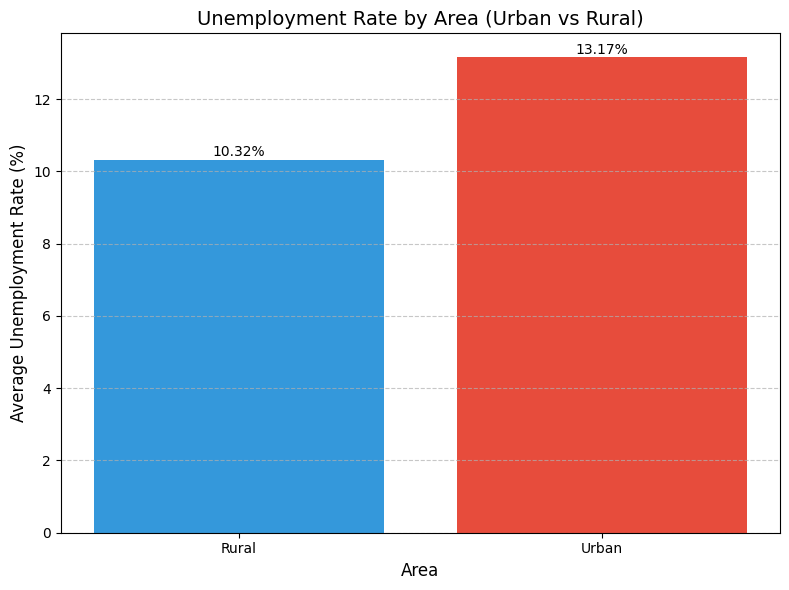

In [16]:
area_unemployment = dataset.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

# Tracer le graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(area_unemployment.index, area_unemployment.values, color=['#3498db', '#e74c3c'])

# Ajouter des labels et un titre
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate by Area (Urban vs Rural)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter des valeurs au-dessus des barres
for i, value in enumerate(area_unemployment.values):
    plt.text(i, value + 0.1, f'{value:.2f}%', ha='center', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()

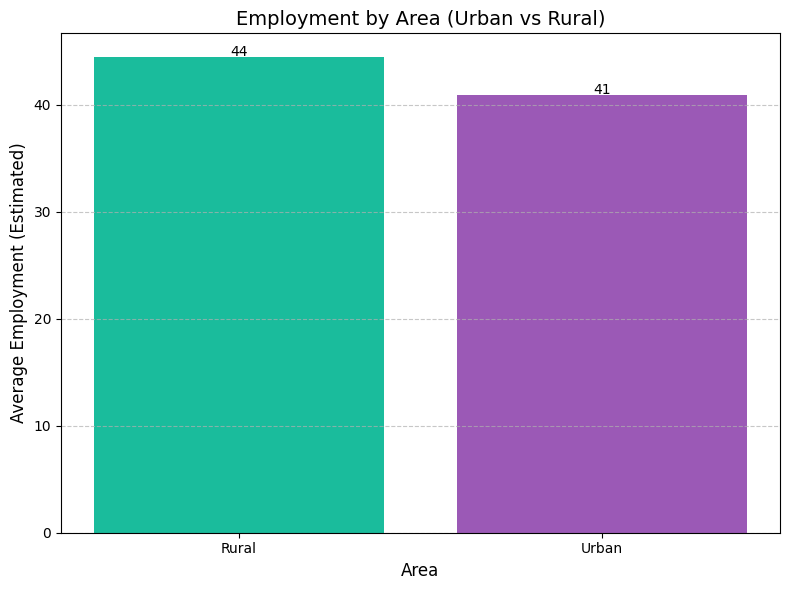

In [17]:
# Calculer le taux d'emploi moyen par zone
area_employment = dataset.groupby('Area')['Estimated Labour Participation Rate (%)'].mean()

# Tracer le graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(area_employment.index, area_employment.values, color=['#1abc9c', '#9b59b6'])

# Ajouter des labels et un titre
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Employment (Estimated)', fontsize=12)
plt.title('Employment by Area (Urban vs Rural)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter des valeurs au-dessus des barres
for i, value in enumerate(area_employment.values):
    plt.text(i, value + 0.1, f'{value:,.0f}', ha='center', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


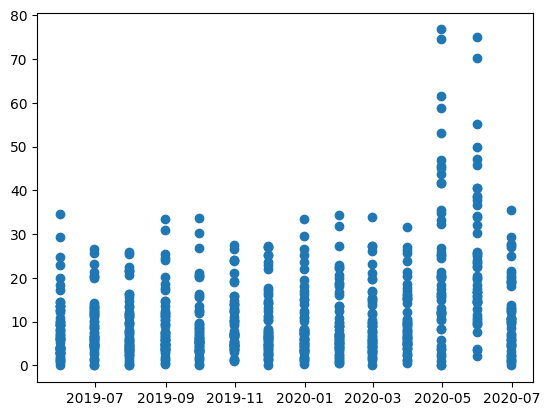

In [18]:
plt.scatter(dataset['Date'],dataset['Estimated Unemployment Rate (%)'])
plt.show()

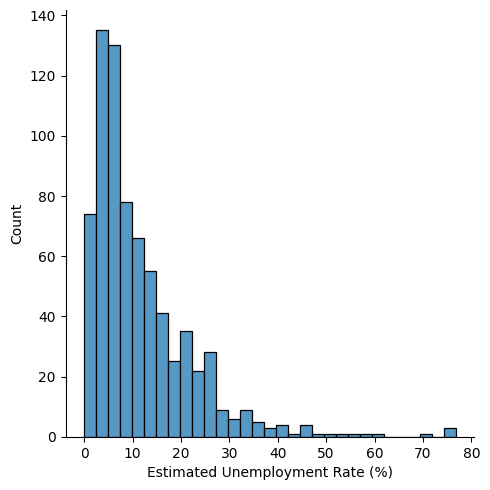

In [19]:
import seaborn as sns
sns.displot(dataset['Estimated Unemployment Rate (%)'])
#	Estimated Employed	Estimated Labour Participation Rate (%)

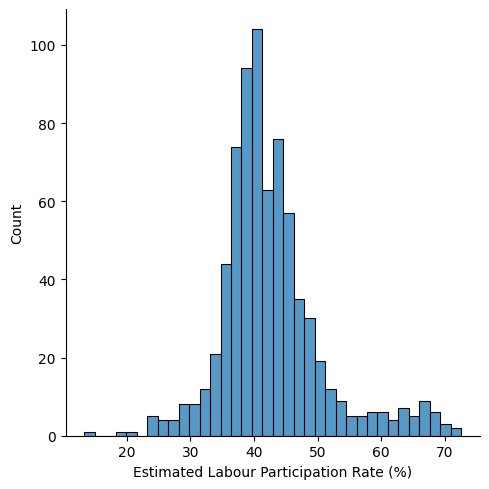

In [20]:
sns.displot(dataset['Estimated Labour Participation Rate (%)'])

In [28]:
dataset.groupby('Region').size()

Region
Andhra Pradesh      28
Assam               26
Bihar               28
Chandigarh          12
Chhattisgarh        28
Delhi               28
Goa                 24
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jammu & Kashmir     21
Jharkhand           28
Karnataka           28
Kerala              28
Madhya Pradesh      28
Maharashtra         28
Meghalaya           27
Odisha              28
Puducherry          26
Punjab              28
Rajasthan           28
Sikkim              17
Tamil Nadu          28
Telangana           28
Tripura             28
Uttar Pradesh       28
Uttarakhand         27
West Bengal         28
dtype: int64

In [29]:
len(dataset['Region'])

740

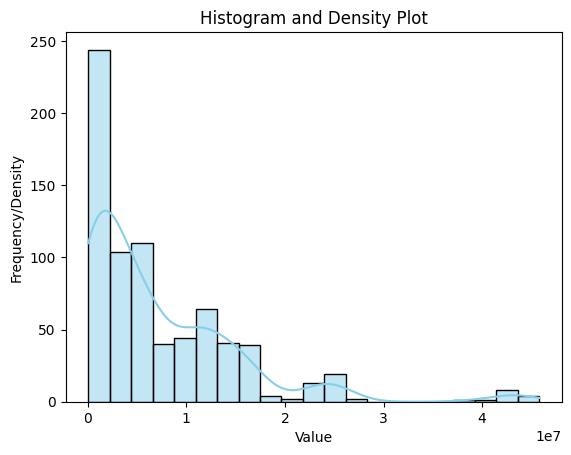

In [31]:
sns.histplot(dataset['Estimated Employed'], kde=True, color='skyblue')
plt.title('Histogram and Density Plot')
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.show()

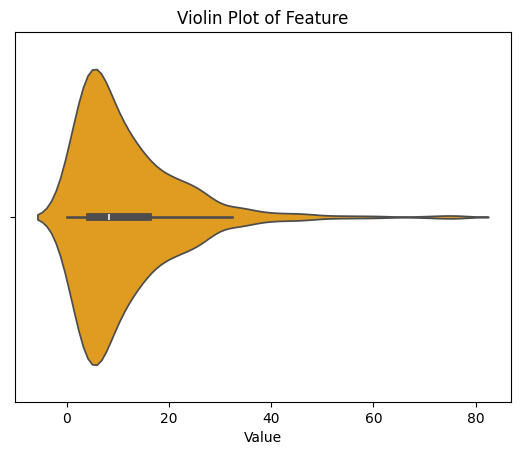

In [35]:
sns.violinplot(x=dataset['Estimated Unemployment Rate (%)'], color='orange')
plt.title('Violin Plot of Feature')
plt.xlabel('Value')
plt.show()

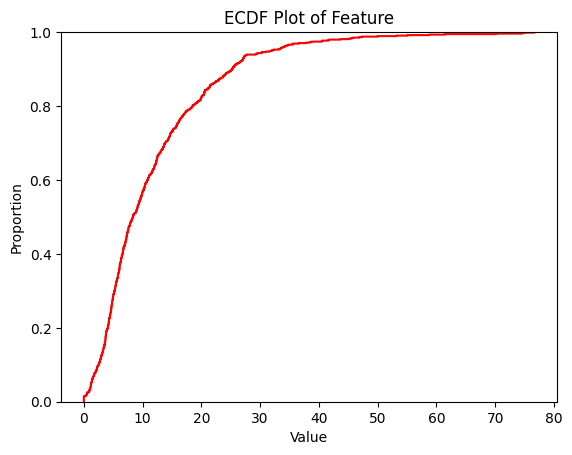

In [37]:
sns.ecdfplot(dataset['Estimated Unemployment Rate (%)'], color='red')
plt.title('ECDF Plot of Feature')
plt.xlabel('Value')
plt.ylabel('Proportion')
plt.show()